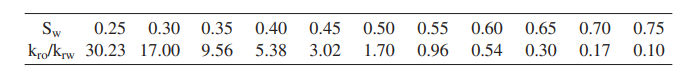

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Sw = [0.25,0.3,0.35,0.4,0.45,0.50,0.55,0.6,0.65,0.7,0.75]
Kro_Krw = [30.23,17,9.56,5.38,3.02,1.7,0.96,0.54,0.3,0.17,0.1]

In [3]:
df = pd.DataFrame({"Sw" :Sw , "Kro/Krw" :Kro_Krw} )
df

,Sw,Kro/Krw
0,0.25,30.23
1,0.30,17.00
2,0.35,9.56
3,0.40,5.38
4,0.45,3.02
5,0.50,1.70
6,0.55,0.96
7,0.60,0.54
8,0.65,0.30
9,0.70,0.17


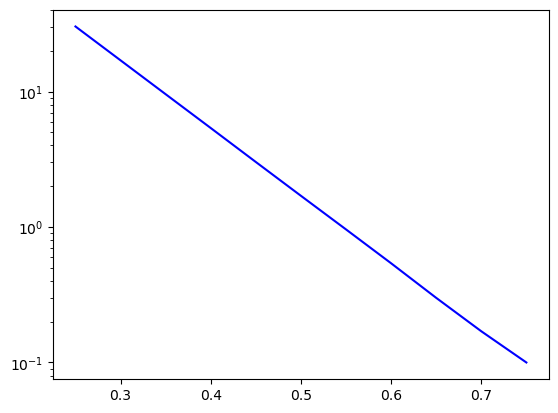

In [4]:
plt.semilogy(df["Sw"],df["Kro/Krw"], c = "b" )

In [5]:
model = np.polyfit(df["Sw"],np.log(df["Kro/Krw"]),1)

In [6]:
model

array([-11.47387085,   6.27172511])

In [7]:
sw = np.random.uniform(0.1,0.85,200)
sw

array([0.54552115, 0.36614885, 0.39228183, 0.45437959, 0.69347787,
       0.56848537, 0.58662217, 0.76754202, 0.48529623, 0.22157364,
       0.77149602, 0.37103526, 0.72411087, 0.21722393, 0.76658562,
       0.48376201, 0.6101992 , 0.31705265, 0.22508368, 0.24011785,
       0.22352344, 0.66492703, 0.38869947, 0.50196829, 0.26997318,
       0.70469593, 0.17196192, 0.46729062, 0.18824689, 0.14833676,
       0.73362007, 0.84866494, 0.59807471, 0.70639619, 0.71602644,
       0.42108634, 0.2627882 , 0.62808569, 0.49468676, 0.4739703 ,
       0.30609691, 0.19912818, 0.56786271, 0.53453465, 0.57704179,
       0.40056415, 0.71159396, 0.28171241, 0.5673374 , 0.64844151,
       0.68605742, 0.31819492, 0.13412933, 0.37782572, 0.64557091,
       0.2002203 , 0.46931027, 0.69772773, 0.12895243, 0.44890457,
       0.66258358, 0.36257475, 0.23219751, 0.24975405, 0.45690532,
       0.46262476, 0.5926232 , 0.58132801, 0.537614  , 0.29948913,
       0.33719975, 0.61323709, 0.7639034 , 0.72762723, 0.36803

In [8]:
af = pd.DataFrame({"sw" : sw})

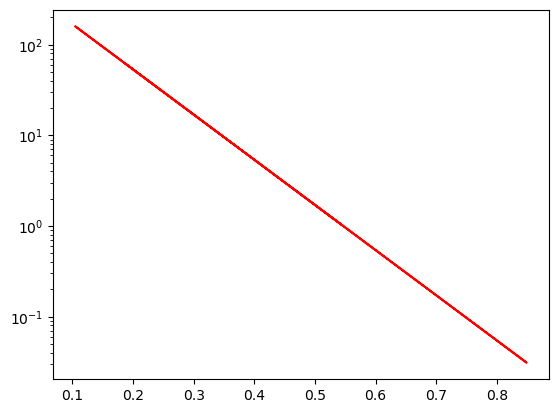

In [9]:
af["kro/krw"] = np.exp(model[1] + model[0] * af["sw"])
plt.semilogy(af["sw"],af["kro/krw"], c = "r")

In [10]:
bf = af.sort_values(by = 'sw')

In [11]:
def nd(oil_viscosity,water_viscosity):
    bf["fw"] = 1 /(1 + water_viscosity*bf["kro/krw"]/oil_viscosity)
    plt.figure(figsize = (14,8))

    plt.plot(bf["sw"],bf["fw"] , c = "b", label= " Sw v/s Fw")
    plt.title("Effect of fluid viscosities on Watercut(fw)")
    plt.xlabel("Water Saturation(Sw)")
    plt.ylabel("Water Cut fw")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.style.use('fivethirtyeight')
    

    plt.grid(True, color = 'g')

In [12]:
from ipywidgets import interact,interactive

In [13]:
interactive(nd , oil_viscosity =(0.5,5,0.2),water_viscosity = (0.5,5,0.2))

interactive(children=(FloatSlider(value=2.7, description='oil_viscosity', max=5.0, min=0.5, step=0.2), FloatSl…